<a href="https://colab.research.google.com/github/mchsidiq12/H8_06/blob/main/PYTN_KampusMerdeka_fp2_Adrian_Dwi_Adinata_Mohammad_Sidik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A. Perkenalan**

Proyek ini membahas implementasi Supervised Machine Learning, yaitu metode klasifikasi. Algoritma model klasifikasi yang digunakan adalah Logistic Regression dan Support Vector Machine (SVM). Tujuan dari proyek ini adalah untuk mengevaluasi dan menerapkan konsep Logistic Regression dan SVM untuk memprediksi apakah esok hari akan turun hujan atau tidak dengan menggunakan metode klasifikasi dalam Machine Learning. Data yang digunakan dalam proyek ini adalah dataset yang berisi dokumen kondisi cuaca dan apakah hari tersebut ada tidaknya hujan selama 10 tahun di beberapa bagian Australia. Dataset terdiri dari 145460 baris dan 23 kolom yang kami dapat di Kaggle. Kolom RainTomorrow akan menjadi target prediksi. Oleh karena itu, tujuan dari proyek ini adalah apakah besok akan hujan (ya) atau tidak (tidak), berdasarkan pengamatan atau catatan kondisi cuaca hari itu.

Deskripsi Fitur :
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediks

# **B. Import pustaka yang dibutuhkan**

Bagian ini berisi dan hanya berisi semua library yang digunakan dalam project.


Mengimpor semua pustaka yang akan digunakan saat pengolahan data

In [1]:
from google.colab import drive #untuk mengakses drive
from dataclasses import dataclass
import pandas as pd #untuk manipulasi data
import numpy as np #untuk komputasi numerik
import matplotlib.pyplot as plt #untuk visualisasi
import seaborn as sns #untuk visualisasi
import datetime
import missingno as msno
import plotly.express as px #untuk visualiasi

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #untuk pemisahan data latih dan uji
from sklearn.linear_model import LogisticRegression #untuk menggunakan algoritma logistic regression
from sklearn import svm


from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

# **C. Data Loading**

Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan eksplorasi data secara sederhana.


Mengakses Google Drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


Mengambil dataset dan menyimpan kedalam variabel df, kemudian mencetak 5 data paling atas

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weatherAUS.csv') 
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Mencetak 5 data paling bawah

In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


Menampilkan 3 contoh data secara acak

In [5]:
df.sample(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
29160,2014-09-14,Richmond,9.1,25.5,0.0,NaN,NaN,SE,35.0,ENE,...,95.0,41.0,1020.8,1014.9,3.0,1.0,14.0,25.2,No,No
80910,2017-03-30,Watsonia,8.7,18.8,4.0,6.4,8.0,SSW,44.0,W,...,98.0,49.0,1016.4,1017.3,4.0,6.0,10.2,17.2,Yes,Yes
78201,2009-08-01,Watsonia,9.5,15.8,0.2,1.6,3.8,NNW,37.0,NNW,...,70.0,64.0,1024.1,1023.0,6.0,7.0,11.8,15.2,No,No


Menampilkan nama-nama kolom pada dataframe

In [6]:
df.columns 

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Menampilkan informasi detail tentang dataframe.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Menampilkan deskriptif statistik data

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Menampilkan deskriptif statistik data objek

In [9]:
df.describe(include='object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


Menampilkan nilai unik dari setiap kolom pada dataframe.

In [10]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

Mengetahui dimensi data

In [11]:
df.shape

(145460, 23)

Mengetahui jumlah seluruh elemen yang ada di dataframe

In [12]:
df.size

3345580

# **D. Data Cleaning**


Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan eksplorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.


Menampilkan jumlah missing value

In [13]:
df.isnull().sum().sum()

343248

Menghapus missing value

In [14]:
df.dropna(axis=0,inplace=True)

Menampilkan kembali jumlah missing value

In [15]:
df.isnull().sum().sum()

0

Mencetak kembali dimensi data setelah menghapus missing value

In [16]:
df.shape

(56420, 23)

Memeriksa apakah terdapat duplikasi dalam data

In [17]:
df.duplicated().sum()

0

Memisahkan kolom kategorik dan numerik

In [18]:
categorical = [cols for cols in df.columns if df[cols].dtypes=='object']
numerical = [cols for cols in df.columns if df[cols].dtypes=='float64']

Mengubah nilai data pada kolom Raintomorow dan Raintodday menjadi 0 (No) dan 1(Yes)

In [19]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

Mengubah format kolom Date menjadi datetime

In [20]:
df["Date"] = pd.to_datetime(df["Date"])

Membuat kolom baru dari datetime yakni tahun, bulan, dan hari

In [21]:
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day

Menampilkan informasi data terbaru

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           56420 non-null  datetime64[ns]
 1   Location       56420 non-null  object        
 2   MinTemp        56420 non-null  float64       
 3   MaxTemp        56420 non-null  float64       
 4   Rainfall       56420 non-null  float64       
 5   Evaporation    56420 non-null  float64       
 6   Sunshine       56420 non-null  float64       
 7   WindGustDir    56420 non-null  object        
 8   WindGustSpeed  56420 non-null  float64       
 9   WindDir9am     56420 non-null  object        
 10  WindDir3pm     56420 non-null  object        
 11  WindSpeed9am   56420 non-null  float64       
 12  WindSpeed3pm   56420 non-null  float64       
 13  Humidity9am    56420 non-null  float64       
 14  Humidity3pm    56420 non-null  float64       
 15  Pressure9am    

# **E. Explorasi Data**


## **Data Visualization**

Menghitung jumlah variasi data pada kolom RainTomorow

In [23]:
df['RainTomorrow'].value_counts()

0    43993
1    12427
Name: RainTomorrow, dtype: int64

Memvisualisasikan Data RainTomorrow

In [24]:
df_rain_tomorrow = df.groupby(by=["RainTomorrow"]).size().reset_index(name="counts")
px.bar(data_frame=df_rain_tomorrow, x="RainTomorrow", y="counts", color="RainTomorrow", barmode="group")

Dari Hasil visualisasi data pada kolom RainTomorow maka dapat diketahui bahwa nilai 0 lebih banyak daripada nilai 1. Artinya berdasarkan catatan kondisi cuaca pada dataset, jumlah hari yang tidak turun hujan  lebih banyak dibandingkan jumlah hari yang turun hujan.

Menghitung jumlah variasi data pada kolom Location

In [25]:
df['Location'].value_counts()

Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: Location, dtype: int64

Memvisualisasikan Data Location

In [26]:
df_location = df.groupby(by=["Location"]).size().reset_index(name="counts")
px.bar(data_frame=df_location, x="Location", y="counts", color="Location", barmode="group")

Dari Hasil visualisasi data pada kolom Location maka dapat diketahui bahwa dilakukan pengambilan data terbanyak pada daerah Darwin dan tersedikit pada daerah Cobar.

**Memvisualisasikan Statistik dan Distribusi Data menggunakan Histogram.**

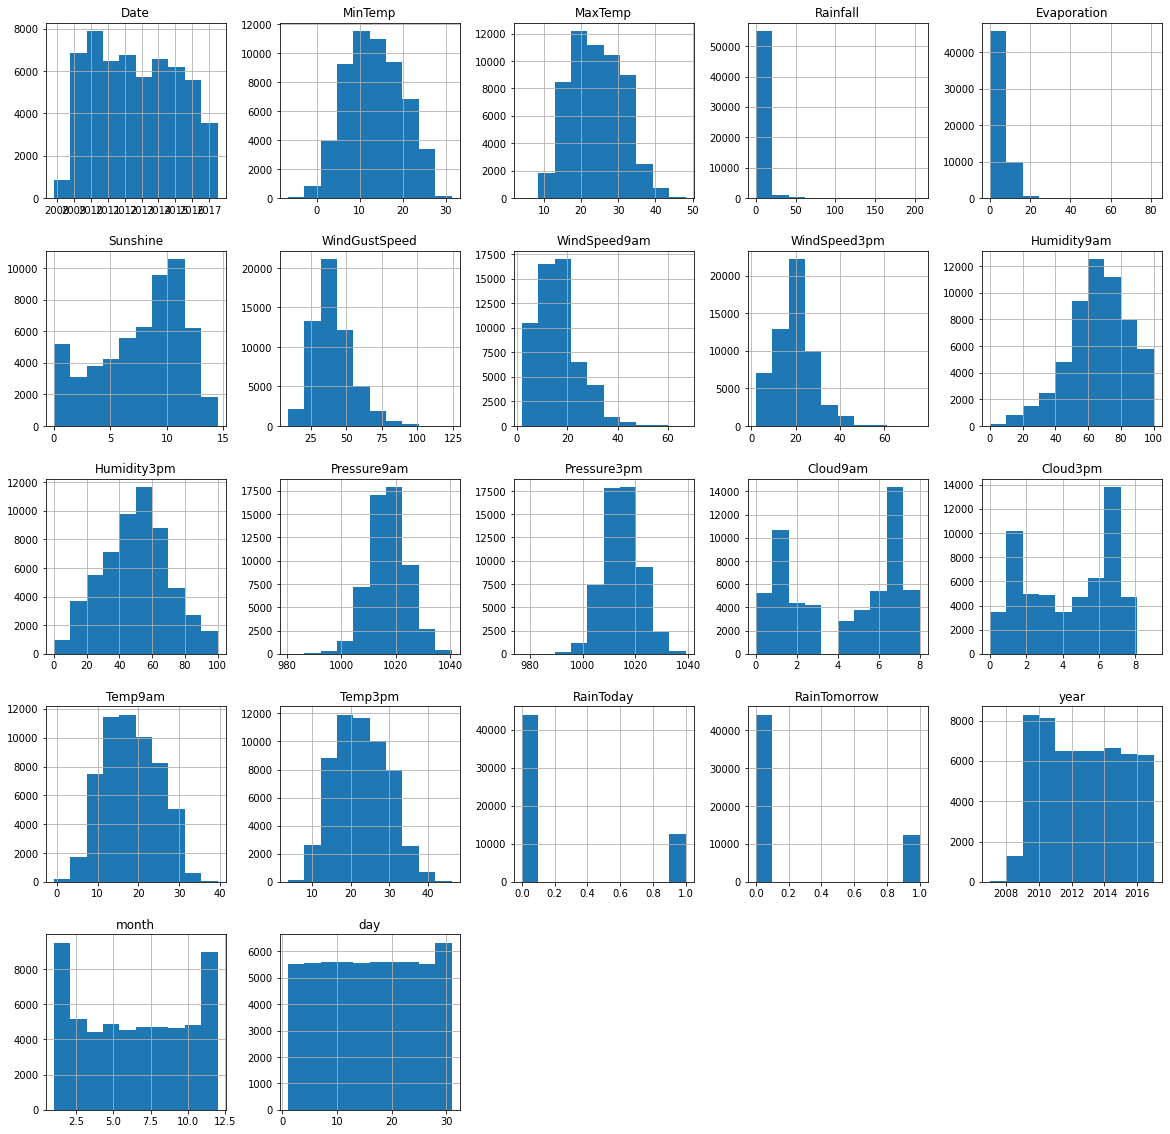

In [27]:
df.hist(figsize=(20, 20))
plt.show()

Berdasarkan plot histogram di atas, dapat diketahui bahwa:

1. Kolom MinTemp dan MaxTemp memiliki distribusi data yang sama.
2. Kolom WindGust3pm memiliki nilai rata-rata lebih besar dibanding dengan kolom WindGust9am, artinya kecepatan angin pada waktu sore cenderung lebih tinggi.
3. Kolom Humidity9am memiliki nilai rata-rata lebih besar dibanding Humidity3pm. Artinya, persentase humiditas pada waktu pagi lebih tinggi dibanding dengan waktu sore.
4. Kolom Pressure9am dan Pressure3pm memiliki nilai rata-rata dan median yang tidak berbeda jauh. Artinya, tekanan udara pada saat pagi maupun sore tidak terjadi perubahan yang signifikan.
5. Kolom Cloud9am dengan Cloud3pm memiliki nilai rata-rata dan median yang tidak berbeda jauh.  Artinya, persentase langit yang tertutup awan pada waktu pagi dan sore tidak mengalami perubahan yang signifikan.
6. Kolom Temp3pm memiliki nilai rata-rata lebih besar dibanding Temp9am. Artinya,temperatur pada sore hari cenderung lebih tinggi dibanding pada pagi hari. 

**Memvisualisasikan Distribusi data menggunakan plot histogram pada kolom Location berdasarkan kolom RainToday sehingga dapat diketahui apakah perbedaan lokasi atau daerah mempengaruhi turunnya hujan atau tidak.**

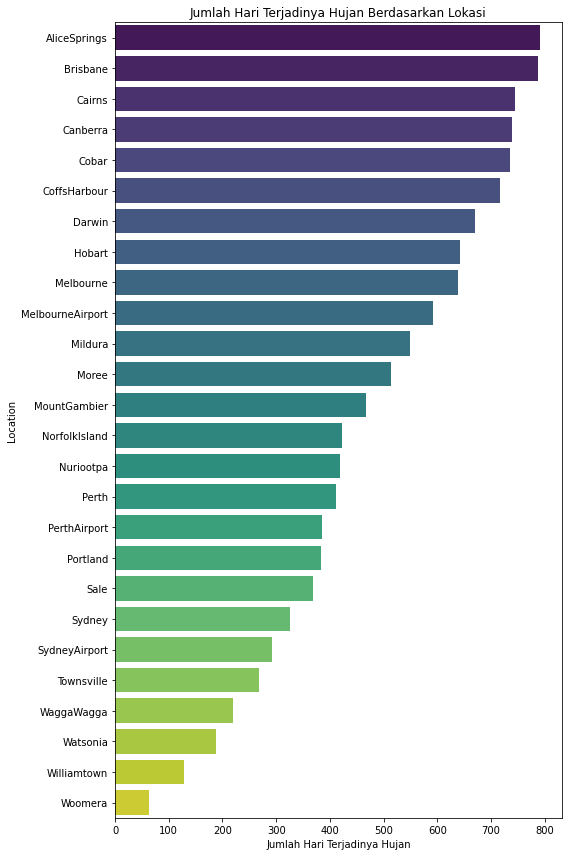

In [28]:
df_rain_by_loc = df.groupby(by='Location').sum()
df_rain_by_loc = df_rain_by_loc[['RainToday']]
df_rain_by_loc.head()

plt.figure(figsize=(8, 12))
sns.barplot(x='RainToday', 
            y=df_rain_by_loc.index, 
            data=df_rain_by_loc.sort_values('RainToday', ascending=False), 
            orient='h',
            palette='viridis'
           )
plt.xlabel('Jumlah Hari Terjadinya Hujan')
plt.title('Jumlah Hari Terjadinya Hujan Berdasarkan Lokasi')
plt.tight_layout()

Berdasarkan plot di atas, diketahui bahwa setiap lokasi memiliki jumlah hari turun hujan masing-masing dan tidak sama dengan lokasi lainnya, sehingga dapat dikatakan bahwa lokasi mempengaruhi prediksi turunnya hujan

**Memvisualisasikan Distribusi data menggunakan lineplot pada kolom month berdasarkan kolom RainToday sehingga dapat diketahui apakah perbedaan bulan dapat mempengaruhi turunnya hujan atau tidak.**

In [29]:
df_season = df.copy()
df_season.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,1004.4,2.0,5.0,26.6,33.4,0,0,2009,1,1
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,1012.1,1.0,1.0,20.3,27.0,0,0,2009,1,2
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1009.2,1.0,6.0,28.7,34.9,0,0,2009,1,4
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,1009.1,1.0,5.0,29.1,35.6,0,0,2009,1,5
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,1007.4,1.0,6.0,33.6,37.6,0,0,2009,1,6


In [30]:
df_season_grouped = df_season.groupby('month').sum()
df_season_grouped = df_season_grouped[['RainToday']]

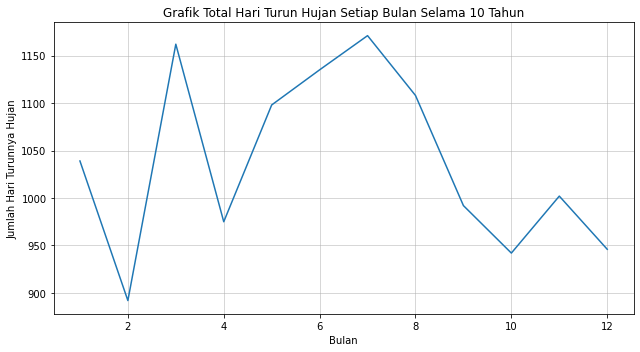

In [31]:
plt.figure(figsize=(9,5))
sns.lineplot(data=df_season_grouped, x=df_season_grouped.index, y='RainToday')
plt.title('Grafik Total Hari Turun Hujan Setiap Bulan Selama 10 Tahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Hari Turunnya Hujan')
plt.grid(linewidth=0.5)
plt.tight_layout()

Berdasarkan plot di atas, dapat diketahui bahwa setiap bulan memiliki jumlah hari turun hujan yang berbeda yakni intensitas turunnya hujan tertinggi di bulan 3 atau bulan Maret dan bulan 7 atau bulan Juli. Sedangkan, pada bulan 2 atau bukan Februari intensitas turunnya hujan paling rendah. Dapat diasumsikan bahwa bulan mempengaruhi prediksi turunnya hujan.

**Memvisualisasikan Distribusi data menggunakan plot histogram pada kolom WindGustDir, WindDir9am, dan WindDir3pm berdasarkan kolom RainTomorrow untuk melihat intensitas turunnya hujan berdasarkan arah mata angin sehingga dapat diketahui apakah kolom tersebut berpengaruh terhadap kolom RainTomorrow.**

In [32]:
df_categorical = df[['RainTomorrow','WindGustDir','WindDir9am','WindDir3pm']]
df_categorical = df_categorical[df_categorical['RainTomorrow']==1]
df_categorical.head()

,RainTomorrow,WindGustDir,WindDir9am,WindDir3pm
6067,1,NNE,ENE,NNE
6070,1,WNW,N,N
6071,1,WSW,NNE,NW
6082,1,WSW,E,SSW
6092,1,E,E,E


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



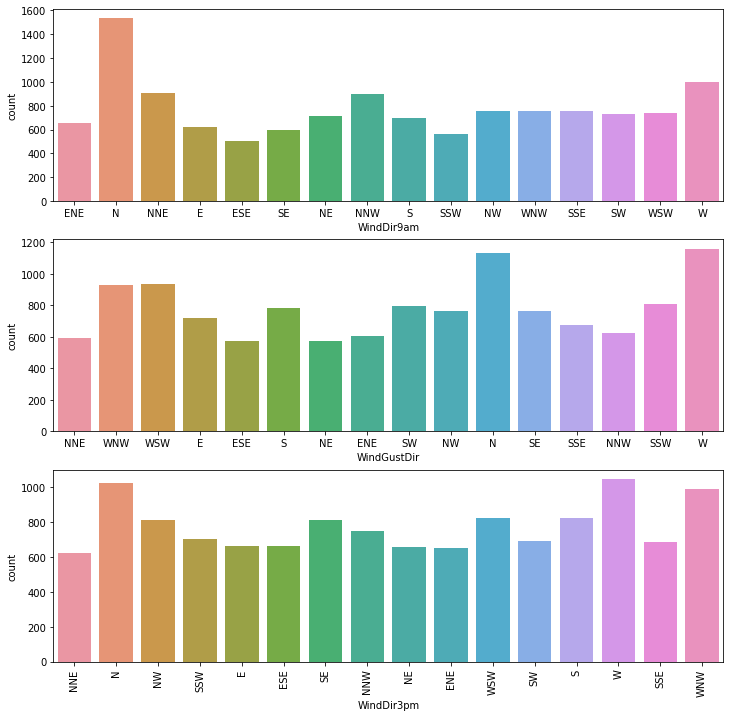

In [33]:
categoricalPlot = ['WindDir9am','WindGustDir', 'WindDir3pm']
fig, ax = plt.subplots(3, 1, figsize=(12,12))

c=0
while c<=2:
    sns.countplot(df_categorical[categoricalPlot[c]], ax=ax[c])
    plt.xticks(rotation=90)
    c+=1
    
plt.show()

Berdasarkan plot di atas, secara grafis diketahui bahwa ketiga kolom arah angin tidak menunjukkan pengaruh yang signifikan terhadap intensitas turunnya hujan. Hal ini ditunjukkan oleh beberapa arah mata angin yang memiliki intensitas atau jumlah hari turunnya hujan dengan jumlah yang sama.

**Memvisualisasikan Distribusi kolom numerik berdasarkan kolom target.**

Text(0.5, 1.0, 'Histogram Kolom Numerik')

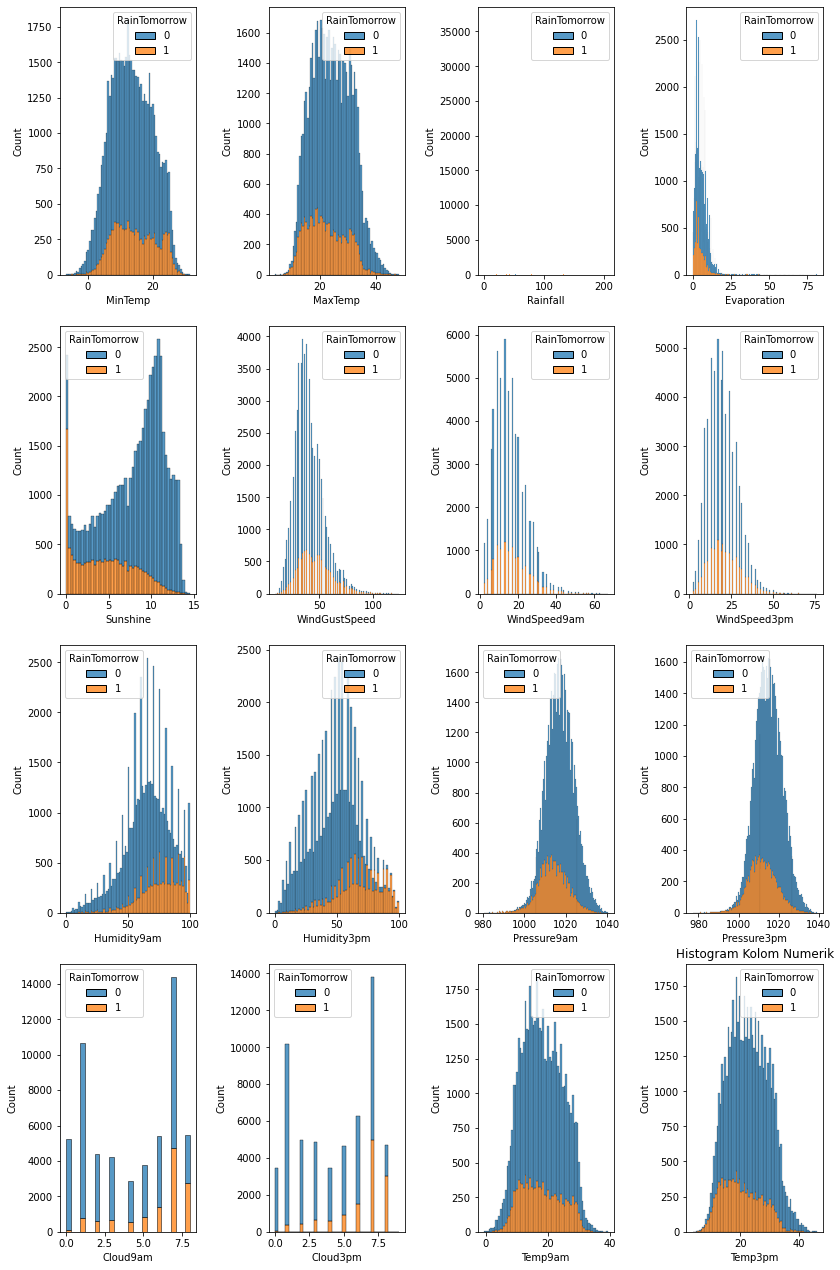

In [34]:
cols = ['MinTemp','MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am','WindSpeed3pm',
       'Humidity9am', 'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

fig, ax = plt.subplots(4, 4, figsize=(12,18))
ax = ax.reshape(-1)

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, hue='RainTomorrow', multiple='stack', ax=ax[i])

fig.tight_layout(pad=2.0)
plt.title('Histogram Kolom Numerik')

Berdasarkan plot di atas, dapat diketahui bahwa:

1. Kolom MinTemp dan MaxTemp cenderung menunjukkan pengaruh yang cukup signifikan terhadap kolom RainTomorrowm. Hal ini ditunjukkan oleh semakin tingginya frekuensi temperatur pada nilai yang rendah, maka semkin tinggi pula frekuensi turunnya hujan juga tinggi dan sebaliknya. Selain itu, asumsi ini juga didukung oleh distribusi frekuensi pada kolom Temp9am dan Temp3pm yang menunjukkan bahwa semakin rendah suhu maka frekuensi turunnya hujan semakin tinggi
2. Kolom Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Pressure9am dan Pressure3pm cenderung tidak menunjukkan pengaruh yang signifikan terhadap kolom RainTomorrow.
3. Kolom Humidity9am dan Humidity3pm menunjukkan pengaruh yang cukup signifikan terhadap kolom RainTomorrow. Hal ini ditunjukkan oleh semakin tingginya frekuensi nilai humiditas, maka frekuensi turunnya hujan juga tinggi.
5. Kolom Cloud9am dan Cloud3pm cenderung menunjukkan pengaruh yang cukup signifikan terhadap kolom RainTomorrow. Hal ini ditunjukkan oleh semakin tingginya frekuensi nilai persentase langit yang tertutup awan, maka frekuensi turunnya hujan juga tinggi.

**Memvisualisasikan Korelasi kolom numerik dengan kolom target.**

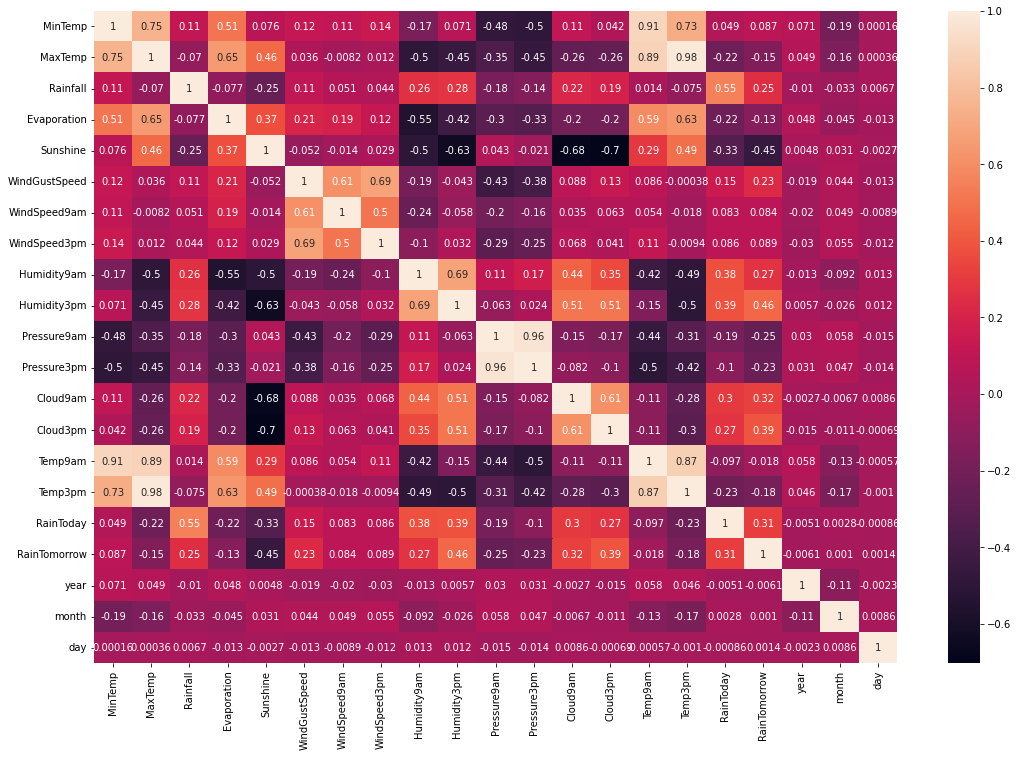

In [35]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

Berdasarkan heatmap di atas, dapat diketahui bahwa kolom Humidity3pm dan RainToday terhadap RainTomorrow memiliki nilai koefisien korelasi paling tinggi. Dapat diasumsikan bahwa :
1. Semakin tinggi tingkat humiditas, maka semakin tinggi juga kemungkinan untuk hujan di esok hari, dan
2. Hujan di hari kemarin juga akan memberikan pengaruh yang cukup signifikan terhadap kemungkinan turun hujan di esok hari.

# **F. Data Preprocessing**

Bagian ini berisi proses penyiapan data untuk proses pelatihan model prediksi klasifikasi., seperti pembagian data menjadi train-dev-test, transformasi data(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

Berdasarkan heatmap di atas, diketahui bahwa kolom-kolom yang memiliki nilai koefisien korelasi rendah terhadap kolom target atau RainTomorrow adalah MinTemp, Evaporation, WindSpeed9am, WindSpeed3pm, dan Temp9am. Maka hapus kolom numerik yang memiliki nilai koefisien korelasi rendah tersebut

In [36]:
df.drop(['MinTemp','Evaporation','WindSpeed9am','WindSpeed3pm','Temp9am'], axis=1, inplace=True)

Berdasarkan analisis eksplorasi data sebelumnya, diasumsikan bahwa ketiga kolom kategorik yaitu WindGustDir, WindDir9am, dan WindDir3pm tidak memiliki pengaruh yang signifikan. Diketahui bahwa kolom-kolom tersebut memiliki nilai koefisien korelasi rendah terhadap kolom target atau RainTomorrow. Maka hapus kolom numerik yang memiliki nilai koefisien korelasi rendah tersebut

In [37]:
df.drop(['WindGustDir','WindDir9am','WindDir3pm'], axis=1, inplace=True)

Berdasarkan heatmap di atas, diketahui bahwa kolom MaxTemp dengan Temp3pm, dan juga kolom Pressure9am dan Pressure3pm memiliki korelasi yang sangat tinggi yaitu 0.98 dan 0.96 sehingga dapat dikatakan variabel tersebut multikolinearitas. Maka dari itu salah satu dari kedua kolom akan didrop atau dihilangkan.



In [38]:
df.drop(['Temp3pm','Pressure3pm'], axis=1, inplace=True)

Menghapus kolom date, year, day karena tidak dibutuhkan lagi

In [39]:
df.drop(['Date','year','day'], axis=1, inplace=True)

Memeriksa kembali ringkasan dari dataset

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       56420 non-null  object 
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Sunshine       56420 non-null  float64
 4   WindGustSpeed  56420 non-null  float64
 5   Humidity9am    56420 non-null  float64
 6   Humidity3pm    56420 non-null  float64
 7   Pressure9am    56420 non-null  float64
 8   Cloud9am       56420 non-null  float64
 9   Cloud3pm       56420 non-null  float64
 10  RainToday      56420 non-null  int64  
 11  RainTomorrow   56420 non-null  int64  
 12  month          56420 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 6.0+ MB


Reset index setelah dilakukan dropping dengan tujuan agar index berurutan

In [41]:
df.reset_index(drop=True, inplace=True)

**Standarisasi data**

Standardisasi adalah proses pengubahan data sehingga rata-rata setiap variabel sama dengan 0 dan simpangan baku setiap variabel adalah 1. Dengan cara ini maka kita akan mendapatkan skala yang sama untuk semua variabel. Standarisasi juga dilakukan karena adanya outlier pada data.

In [42]:
columns = ['MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm',
       'month', 'RainToday', 'RainTomorrow','Location']

In [43]:
data = df[columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MaxTemp        56420 non-null  float64
 1   Rainfall       56420 non-null  float64
 2   Sunshine       56420 non-null  float64
 3   WindGustSpeed  56420 non-null  float64
 4   Humidity9am    56420 non-null  float64
 5   Humidity3pm    56420 non-null  float64
 6   Pressure9am    56420 non-null  float64
 7   Cloud9am       56420 non-null  float64
 8   Cloud3pm       56420 non-null  float64
 9   month          56420 non-null  int64  
 10  RainToday      56420 non-null  int64  
 11  RainTomorrow   56420 non-null  int64  
 12  Location       56420 non-null  object 
dtypes: float64(9), int64(3), object(1)
memory usage: 5.6+ MB


In [44]:
scaler = StandardScaler()
scaler.fit(data.drop(['RainToday','RainTomorrow','Location',], axis=1))
scaled_features = scaler.transform(data.drop(['RainToday','RainTomorrow','Location'], axis=1))
df_feat = pd.DataFrame(scaled_features,columns = data.columns[:-3])
df_feat.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,month
0,1.575298,-0.303702,1.214537,0.534126,-2.477924,-1.812261,-1.583303,-0.801428,0.254411,-1.57185
1,0.671504,-0.303702,1.400800,-0.290764,-1.937767,-2.059824,-0.628068,-1.158937,-1.256603,-1.57185
2,1.919600,-0.303702,0.762183,0.384146,-1.289578,-1.366647,-0.714907,-1.158937,0.632165,-1.57185
3,2.034368,-0.303702,1.187928,-0.740704,-1.559657,-1.366647,-0.657014,-1.158937,0.254411,-1.57185
4,2.407362,-0.303702,0.176784,-0.440744,-2.531940,-1.713236,-0.946479,-1.158937,0.632165,-1.57185


Menambahkan kolom Location dan RainToday

In [45]:
df_feat['Location'] = data['Location']
df_feat['RainToday'] = data['RainToday']

df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MaxTemp        56420 non-null  float64
 1   Rainfall       56420 non-null  float64
 2   Sunshine       56420 non-null  float64
 3   WindGustSpeed  56420 non-null  float64
 4   Humidity9am    56420 non-null  float64
 5   Humidity3pm    56420 non-null  float64
 6   Pressure9am    56420 non-null  float64
 7   Cloud9am       56420 non-null  float64
 8   Cloud3pm       56420 non-null  float64
 9   month          56420 non-null  float64
 10  Location       56420 non-null  object 
 11  RainToday      56420 non-null  int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 5.2+ MB


**Encoder untuk kolom Location**

In [46]:
df_dummies = pd.get_dummies(df_feat, columns=['Location'])
df_dummies.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,month,...,Location_PerthAirport,Location_Portland,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_WaggaWagga,Location_Watsonia,Location_Williamtown,Location_Woomera
0,1.575298,-0.303702,1.214537,0.534126,-2.477924,-1.812261,-1.583303,-0.801428,0.254411,-1.57185,...,0,0,0,0,0,0,0,0,0,0
1,0.671504,-0.303702,1.400800,-0.290764,-1.937767,-2.059824,-0.628068,-1.158937,-1.256603,-1.57185,...,0,0,0,0,0,0,0,0,0,0
2,1.919600,-0.303702,0.762183,0.384146,-1.289578,-1.366647,-0.714907,-1.158937,0.632165,-1.57185,...,0,0,0,0,0,0,0,0,0,0
3,2.034368,-0.303702,1.187928,-0.740704,-1.559657,-1.366647,-0.657014,-1.158937,0.254411,-1.57185,...,0,0,0,0,0,0,0,0,0,0
4,2.407362,-0.303702,0.176784,-0.440744,-2.531940,-1.713236,-0.946479,-1.158937,0.632165,-1.57185,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df_final = df_dummies.copy()

**Dataset Split**

Membagi data training sebesar 70% dan data testing sebesar 30%

In [48]:
X = df_final #fitur
y = df.RainTomorrow #target

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# **G. Pendefinisian Model**

## **Logistic Regression**

In [50]:
model_logreg = LogisticRegression(C=0.7, class_weight='balanced', solver='liblinear', random_state=0)

## **SVM**

In [51]:
model_svm = svm.SVC(class_weight='balanced', kernel='linear')

# **H. Pelatihan Model**

## **Logistic Regression**

In [52]:
model_logreg.fit(X_train, y_train)

LogisticRegression(C=0.7, class_weight='balanced', random_state=0,
                   solver='liblinear')

## **SVM**

In [53]:
model_svm.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear')

# **I. Evaluasi Model**

## **Logistic Regression**

In [54]:
y_pred_lr = model_logreg.predict(X_test)

In [55]:
model_logreg.score(X_train, y_train)

0.8001215374487264

In [56]:
print("Nilai koefisien regresi:\n", model_logreg.coef_)
print("Nilai intersep:\n", model_logreg.intercept_)

Nilai koefisien regresi:
 [[ 0.31020937  0.05998691 -0.73252652  0.61867088  0.23134502  0.89778979
  -0.37953842 -0.18863605  0.33858508  0.14813043  0.25934511 -0.13352501
   0.71128016 -0.07917073  0.13047968 -0.05086822  0.30698593 -0.36985385
  -0.22371639 -0.15645444 -0.49984311 -0.0751164  -0.04965227 -0.01770473
   0.02824333  0.01526507  0.61324055  0.26989394  0.14352123 -0.44843982
   0.19294656 -0.14366169 -0.74832253  0.16287956 -0.04187287  0.08318044
  -0.35922261]]
Nilai intersep:
 [-0.73950822]


Menghitung RMSE untuk regresi linier

In [57]:
mse = mean_squared_error(y_test,y_pred_lr)
rootmeansq = np.sqrt(mse)
print(mse)
print(rootmeansq)

0.20040174878884556
0.44766253896081765


Confusion Matrix Logistics Regression

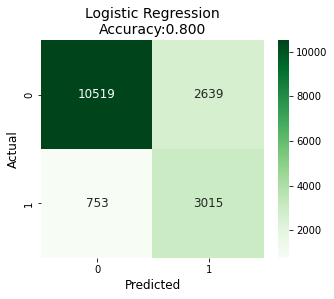

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86     13158
           1       0.53      0.80      0.64      3768

    accuracy                           0.80     16926
   macro avg       0.73      0.80      0.75     16926
weighted avg       0.84      0.80      0.81     16926

Accuracy Score:- 0.7995982512111545
Precision Score:- 0.5332507958967103
Recall Score:- 0.8001592356687898
F1 Score: 0.6399915092337083


In [58]:
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="Greens", annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_lr)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_lr)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_lr)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_lr)}')
print("F1 Score:",f1_score(y_test,y_pred_lr))

## **SVM**

In [59]:
y_pred_svm = model_svm.predict(X_test)

In [60]:
model_svm.score(X_train, y_train)

0.7967792576087507

Confusion Matrix Support Vector Machine

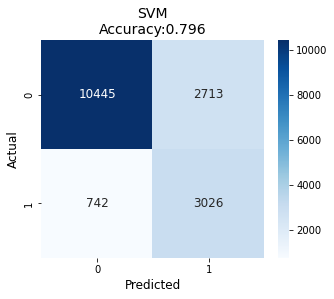

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.86     13158
           1       0.53      0.80      0.64      3768

    accuracy                           0.80     16926
   macro avg       0.73      0.80      0.75     16926
weighted avg       0.84      0.80      0.81     16926

Accuracy Score:- 0.7958761668439088
Precision Score:- 0.5272695591566475
Recall Score:- 0.8030785562632696
F1 Score: 0.6365835700010519


In [61]:
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="Blues", annot_kws={"fontsize":12})
plt.title("SVM\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_svm)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_svm)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_svm)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_svm)}')
print("F1 Score:",f1_score(y_test,y_pred_svm))

Dari model yang telah dibuat, dapat dilihat bahwa model LogisticRegression memiliki performa prediksi lebih baik dibanding SVM. Walaupun SVM memiliki tingkat akurasi lebih tinggi, tetapi tingkat performa klasifikasi cenderung sama. Oleh karena itu, LogisticRegression digunakan untuk memprediksi label/target pada dataset ini, di mana model LogisticRegression memiliki nilai akurasi sebesar 0.80, precision score sebesar 0.53, recall Score sebesar 0.80 dan F1 Score sebesar 0.64.

# **J.Model Inference**

Untuk menguji keakuratan model dan prediksi hujan atau tidaknya esok hari di suatu wilayah, dilakukan model inference untuk menguji model dengan data di luar data yang tersedia. Adapun isi yang memuat model inference adalah :

- Location = wilayah pengguna
- Month = bulan hari ini 
- MaxTemp = temperatur tertinggi hari itu dalam celcius
- Rainfall = jumlah curah hujan hari itu dalam mm
- Sunshine = jumlah jam hari itu cerah dengan cahaya matahari
- WindSpeed = kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
- Humidity9am = humiditas jam 9 pagi dalam persen
- Humidity3pm = humiditas jam 3 sore dalam persen
- Pressure9am = tekanan udara jam 9 pagi dalam hpa
- Cloud9am = persentase langit yang tertutup awan jam 9 pagi.
- Cloud3pm = persentasi langit yang tertutup awan jam 3 sore.
- RainToday = apakah hari ini hujan


Skenario 1

Suatu hari bulan Februari di Darwin, Australia tercatat laporan kondisi cuaca pada hari itu yang dilampirkan sebagai berikut:

1. Temperatur maksimal: 28 
2. Jumlah curah hujan: 0
3. Jumlah jam hari itu cerah dengan cahaya matahari: 12 
4. Kecepatan angin: 45
5. Jumlah Humiditas pada pukul 9 pagi: 60
6. Jumlah Humiditas pada pukul 3 sore: 30
7. Tekanan Udara pada pukul 9 pagi: 1025
8. Persentase langit tertutup awan pada pukul 9 pagi: 3.8
9. Persentase langit tertutup awan pada pukul 3 sore: 4

Hari ini tidak turun hujan, apakah berdasarkan kondisi cuaca hari ini akan turun hujan keesokan harinya?

In [102]:
print('Input Data')

location = input('Location:')
month = int(input('Month:'))
maxtemp = float(input("Max Temperature:"))
rainfall = float(input("Rainfall (in mm):"))
sunshine = float(input("Sunshine hour:"))
windspeed = float(input("Wind Speed:"))
humidity9 = float(input("Humidity percentation at 9 AM:"))
humidity3 = float(input("Humidity percentation at 3 PM:"))
pressure = float(input("Pressure at 9 AM:"))
cloud9am = float(input("Cloud persentation at 9 AM:"))
cloud3pm = float(input("Cloud persentation at 3 PM:"))
raintoday = int(input('Is today raining? Please type 1 for YES and 0 for NO '))

val = [maxtemp, rainfall, sunshine, windspeed, humidity9, humidity3, pressure, cloud9am, cloud3pm, month]
val = scaler.transform([val])
val = val.reshape(10,)

if raintoday == 1:
    val = np.append(val, 1)
elif raintoday == 0:
    val = np.append(val, 0)
else:
    print('ERROR!')

locations = {"AliceSprings":0,"Brisbane":1,"Cairns":2,"Canberra":3,
            "Cobar":4,"Coffs Harbour":5,"Darwin":6,"Hobart":7,
            "Melbourne":8,"Melbourne Airport":9,"Mildura":10,"Moree":11,
            "Mount Gambier":12,"Norfolk Island":13,"Nuriootpa":14,"Perth":15,
            "Perth Airport":16,"Portland":17,"Sale":18,"Sydney":19,
            "Sydney Airport":20, "Townsville":21,"Wagga Wagga":22,"Watsonia":23, 
            "Williamtown":24, "Woomera":25}

for i in range(0,26):
    if locations[location]==i:
        val = np.append(val, 1)
    else:
        val = np.append(val, 0)

print(val)

val_predict = model_logreg.predict([val])

if val_predict == 1:
    print('Prediction is 1 or True, then it is predicted that it will rain tomorrow')
elif val_predict == 0:
    print('Prediction is 0 or False, then it is predicted that it will NOT rain tomorrow')
else:
    print('Invalid Prediction')

Input Data
Location:Darwin
Month:2
Max Temperature:28
Rainfall (in mm):0
Sunshine hour:12
Wind Speed:45
Humidity percentation at 9 AM:60
Humidity percentation at 3 PM:30
Pressure at 9 AM:1025
Cloud persentation at 9 AM:3.8
Cloud persentation at 3 PM:4
Is today raining? Please type 1 for YES and 0 for NO 0
[ 0.54239034 -0.30370205  1.13470946  0.30915626 -0.31729503 -0.97054613
  1.1231962  -0.15791325 -0.12334239 -1.28210861  0.          0.
  0.          0.          0.          0.          0.          1.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
Prediction is 0 or False, then it is predicted that it will NOT rain tomorrow


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



Skenario 2

Suatu hari bulan Oktober di Sydney, Australia tercatat laporan kondisi cuaca pada hari itu yang dilampirkan sebagai berikut:

1. Temperatur maksimal: 20
2. Jumlah curah hujan: 3
3. Jumlah jam hari itu cerah dengan cahaya matahari: 12
4. Kecepatan angin: 40
5. Jumlah Humiditas pada pukul 9 pagi: 20
6. Jumlah Humiditas pada pukul 3 sore: 30
7. Tekanan Udara pada pukul 9 pagi: 1000
8. Persentase langit tertutup awan pada pukul 9 pagi: 20
9. Persentase langit tertutup awan pada pukul 3 sore: 40

Hari ini turun hujan, apakah berdasarkan kondisi cuaca hari ini akan turun hujan keesokan harinya?

In [107]:
print('Input Data')

location = input('Location:')
month = int(input('Month:'))
maxtemp = float(input("Max Temperature:"))
rainfall = float(input("Rainfall (in mm):"))
sunshine = float(input("Sunshine hour:"))
windspeed = float(input("Wind Speed:"))
humidity9 = float(input("Humidity percentation at 9 AM:"))
humidity3 = float(input("Humidity percentation at 3 PM:"))
pressure = float(input("Pressure at 9 AM:"))
cloud9am = float(input("Cloud persentation at 9 AM:"))
cloud3pm = float(input("Cloud persentation at 3 PM:"))
raintoday = int(input('Is today raining? Please type 1 for YES and 0 for NO '))

val = [maxtemp, rainfall, sunshine, windspeed, humidity9, humidity3, pressure, cloud9am, cloud3pm, month]
val = scaler.transform([val])
val = val.reshape(10,)

if raintoday == 1:
    val = np.append(val, 1)
elif raintoday == 0:
    val = np.append(val, 0)
else:
    print('ERROR!')

locations = {"AliceSprings":0,"Brisbane":1,"Cairns":2,"Canberra":3,
            "Cobar":4,"Coffs Harbour":5,"Darwin":6,"Hobart":7,
            "Melbourne":8,"Melbourne Airport":9,"Mildura":10,"Moree":11,
            "Mount Gambier":12,"Norfolk Island":13,"Nuriootpa":14,"Perth":15,
            "Perth Airport":16,"Portland":17,"Sale":18,"Sydney":19,
            "Sydney Airport":20, "Townsville":21,"Wagga Wagga":22,"Watsonia":23, 
            "Williamtown":24, "Woomera":25}

for i in range(0,26):
    if locations[location]==i:
        val = np.append(val, 1)
    else:
        val = np.append(val, 0)

print(val)

val_predict = model_logreg.predict([val])

if val_predict == 1:
    print('Prediction is 1 or True, then it is predicted that it will rain tomorrow')
elif val_predict == 0:
    print('Prediction is 0 or False, then it is predicted that it will NOT rain tomorrow')
else:
    print('Invalid Prediction')

Input Data
Location:Sydney
Month:10
Max Temperature:20
Rainfall (in mm):3
Sunshine hour:12
Wind Speed:40
Humidity percentation at 9 AM:20
Humidity percentation at 3 PM:30
Pressure at 9 AM:1000
Cloud persentation at 9 AM:20
Cloud persentation at 3 PM:40
Is today raining? Please type 1 for YES and 0 for NO 1
[-0.60528464  0.1239676   1.13470946 -0.06579368 -2.4779243  -0.97054613
 -2.49511768  5.63372183 13.47578934  1.03582322  1.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  1.          0.          0.          0.          0.          0.
  0.        ]
Prediction is 1 or True, then it is predicted that it will rain tomorrow


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



# **K. Kesimpulan**

Berdasarkan keseluruhan hasil analisis di atas, dapat disimpulkan bahwa:

1. Proyek ini membahas implementasi Supervised Learning, yaitu metode klasifikasi. Algoritma model klasifikasi yang digunakan adalah Logistics Regression dan Support Vector Machine (SVM). Tujuan dari proyek ini adalah untuk mengevaluasi dan menerapkan konsep Logistics Regression dan SVM untuk metode klasifikasi dalam Machine Learning. Data yang digunakan dalam proyek ini adalah dataset yang berisi dokumen kondisi cuaca dan ada tidaknya hujan selama 10 tahun di beberapa bagian Australia. Kolom RainTomorrow akan menjadi target prediksi ini. Oleh karena itu, tujuan dari proyek ini adalah apakah besok akan hujan (ya) atau tidak (tidak), berdasarkan pengamatan atau catatan kondisi cuaca hari itu.
2. Lokasi AliceSprings adalah lokasi yang memiliki intensitas hujan tertinggi. 
3. Bulan Maret dan Juli adalah bulan yang memiliki intensitas hujan tertinggi. Sedangkan bulan Desember dan Februari memiliki intensitas hujan terendah.
4. Algoritma model klasifikasi yang digunakan adalah Logistic Regression dan Support Vector Machine (SVM). Walaupun model SVM juga memiliki performa yang baik dan tidak terdapat perbedaan tingkat klasifikasi dengan LogisticRegression, SVM cenderung memakan waktu lebih lama dalam proses pelatihan model. 
5. Telah didapatkan model prediksi cuaca pada 25 daerah di Australia.

Sehingga berdasarkan pelatihan model yang sudah dilakukan, algoritma yang dipilih adalah LogisticRegression dan didapat nilai akurasi akhir sebesar 80%, nilai precision sebesar 0.53, recall sebesar 0.80, dan f1-score sebesar 0.64.